SETTING UP THE MODULES(PANDAS, NUMPY) AND IMPORTING THE DATASET

In [1]:
import pandas as pd
import numpy as np

In [2]:
cvd = pd.read_csv("covid_worldwide.csv")

In [3]:
cvd.head()

,Serial Number,Country,Total Cases,Total Deaths,Total Recovered,Active Cases,Total Test,Population
0,1,USA,"104,196,861","1,132,935","101,322,779","1,741,147","1,159,832,679","334,805,269"
1,2,India,"44,682,784","530,740","44,150,289","1,755","915,265,788","1,406,631,776"
2,3,France,"39,524,311","164,233","39,264,546","95,532","271,490,188","65,584,518"
3,4,Germany,"37,779,833","165,711","37,398,100","216,022","122,332,384","83,883,596"
4,5,Brazil,"36,824,580","697,074","35,919,372","208,134","63,776,166","215,353,593"


DATA CLEANING AND TRANSFORMATION

1. Missing data

In [4]:
cvd.isnull().sum()

Serial Number       0
Country             0
Total Cases         0
Total Deaths        6
Total Recovered    21
Active Cases       19
Total Test         18
Population          3
dtype: int64

In [5]:
cvd[['Total Deaths', 'Total Recovered', 'Active Cases', 'Total Test']] = cvd[['Total Deaths', 'Total Recovered', 'Active Cases', 'Total Test']].fillna(0)

In [6]:
cvd.isnull().sum()

Serial Number      0
Country            0
Total Cases        0
Total Deaths       0
Total Recovered    0
Active Cases       0
Total Test         0
Population         3
dtype: int64

In [7]:
cvd = cvd.dropna(subset=['Population'])

In [8]:
cvd.isnull().sum()

Serial Number      0
Country            0
Total Cases        0
Total Deaths       0
Total Recovered    0
Active Cases       0
Total Test         0
Population         0
dtype: int64

In [9]:
cvd.tail()

,Serial Number,Country,Total Cases,Total Deaths,Total Recovered,Active Cases,Total Test,Population
224,225,Montserrat,"1,403",8,"1,376",19,"17,762","4,965"
225,226,Niue,747,0,746,1,0,"1,622"
227,228,Vatican City,29,0,29,0,0,799
228,229,Western Sahara,10,1,9,0,0,"626,161"
230,231,Tokelau,5,0,0,5,0,"1,378"


2. Data types

In [10]:
cvd.dtypes

Serial Number       int64
Country            object
Total Cases        object
Total Deaths       object
Total Recovered    object
Active Cases       object
Total Test         object
Population         object
dtype: object

In [11]:
# First, I convert the fields from string(object) to decimals(float64) so that I can remove the commas from the strings. 

convert = ['Total Cases', 'Total Deaths', 'Total Recovered', 'Active Cases', 'Total Test', 'Population']
cvd[convert] = cvd[convert].apply(lambda x: x.str.replace(',', '').astype(float))

In [12]:
cvd.dtypes

Serial Number        int64
Country             object
Total Cases        float64
Total Deaths       float64
Total Recovered    float64
Active Cases       float64
Total Test         float64
Population         float64
dtype: object

In [13]:
# Then in order for me to convert the fields from decimals(float64) to whole numbers(int), I need to replace the non-finite values('NaN' or 'inf') with zero.

replace = ['Total Cases', 'Total Deaths', 'Total Recovered', 'Active Cases', 'Total Test', 'Population']
cvd[replace] = cvd[replace].apply(lambda x: x.fillna(0).replace([np.inf, -np.inf], 0).astype(int))

In [14]:
cvd.dtypes

Serial Number       int64
Country            object
Total Cases         int32
Total Deaths        int32
Total Recovered     int32
Active Cases        int32
Total Test          int32
Population          int32
dtype: object

In [15]:
cvd = cvd.replace('USA', 'United States of America')
cvd = cvd.replace('Western Sahara', 'W. Sahara')
cvd = cvd.replace('Dominican Republic', 'Dominican Rep.')
cvd = cvd.replace('DRC', 'Dem. Rep. Congo')
cvd = cvd.replace('Falkland Islands', 'Falkland Is.')
cvd = cvd.replace('Equatorial Guinea', 'Eq. Guinea')
cvd = cvd.replace('CAR', 'Central African Rep.')
cvd = cvd.replace("Ivory Coast", "Côte d'Ivoire")
cvd = cvd.replace('Eswatini', 'eSwatini')
cvd = cvd.replace('DPRK', 'North Korea')
cvd = cvd.replace('S. Korea', 'South Korea')
cvd = cvd.replace('UAE', 'United Arab Emirates')
cvd = cvd.replace('UK', 'United Kingdom')
cvd = cvd.replace('South Sudan', 'S. Sudan')
cvd = cvd.replace('Bosnia and Herzegovina', 'Bosnia and Herz.')
cvd = cvd.replace('Solomon Islands', 'Solomon Is')

new_row = {'Serial Number': '91', 
           'Country': 'China', 
           'Total Cases': 503302, 
           'Total Deaths': 5272, 
           'Total Recovered': 379053,
           'Active Cases': 118977,
           'Total Test': 160000000,
           'Population': 1425893465
           }
cvd = cvd.append(new_row, ignore_index=True)

C:\Users\USER\AppData\Local\Temp\ipykernel_9232\666807371.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cvd = cvd.append(new_row, ignore_index=True)


In [16]:
cvd_sorted = cvd.sort_values(by='Population', ascending=False)
cvd_sorted.head()

,Serial Number,Country,Total Cases,Total Deaths,Total Recovered,Active Cases,Total Test,Population
228,91,China,503302,5272,379053,118977,160000000,1425893465
1,2,India,44682784,530740,44150289,1755,915265788,1406631776
0,1,United States of America,104196861,1132935,101322779,1741147,1159832679,334805269
19,20,Indonesia,6730289,160817,6565208,4264,114158919,279134505
52,53,Pakistan,1576313,30640,1538689,6984,30570862,229488994


DATA VISUALIZATION

1. Setting up the module(matplotlib, geopandas)

In [17]:
import geopandas as gpd
import matplotlib.pyplot as plt

2. Merginng geopandas dataset with current dataset and clean the new merged datasets

In [18]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
merged = world.merge(cvd, how='left', left_on='name', right_on='Country')
merged.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,Serial Number,Country,Total Cases,Total Deaths,Total Recovered,Active Cases,Total Test,Population
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",143,Fiji,68820.0,883.0,66780.0,1157.0,6.677150e+05,909466.0
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",157,Tanzania,42664.0,846.0,0.0,0.0,0.000000e+00,63298550.0
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",229,W. Sahara,10.0,1.0,9.0,0.0,0.000000e+00,626161.0
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",34,Canada,4550256.0,50380.0,4444013.0,55863.0,6.634312e+07,38388419.0
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",1,United States of America,104196861.0,1132935.0,101322779.0,1741147.0,1.159833e+09,334805269.0


In [19]:
merged.isnull().sum()

pop_est            0
continent          0
name               0
iso_a3             0
gdp_md_est         0
geometry           0
Serial Number      8
Country            8
Total Cases        8
Total Deaths       8
Total Recovered    8
Active Cases       8
Total Test         8
Population         8
dtype: int64

In [20]:
merged = merged.dropna(subset=['Population'])
merged.isnull().sum()

pop_est            0
continent          0
name               0
iso_a3             0
gdp_md_est         0
geometry           0
Serial Number      0
Country            0
Total Cases        0
Total Deaths       0
Total Recovered    0
Active Cases       0
Total Test         0
Population         0
dtype: int64

3. Number of Countries with the Covid-19

In [21]:
n = merged['Country'].nunique()
print('Number of Countries that had the virus: ', n)

Number of Countries that had the virus:  169


4. Creating a Geographical Plot for Total Death Worldwide

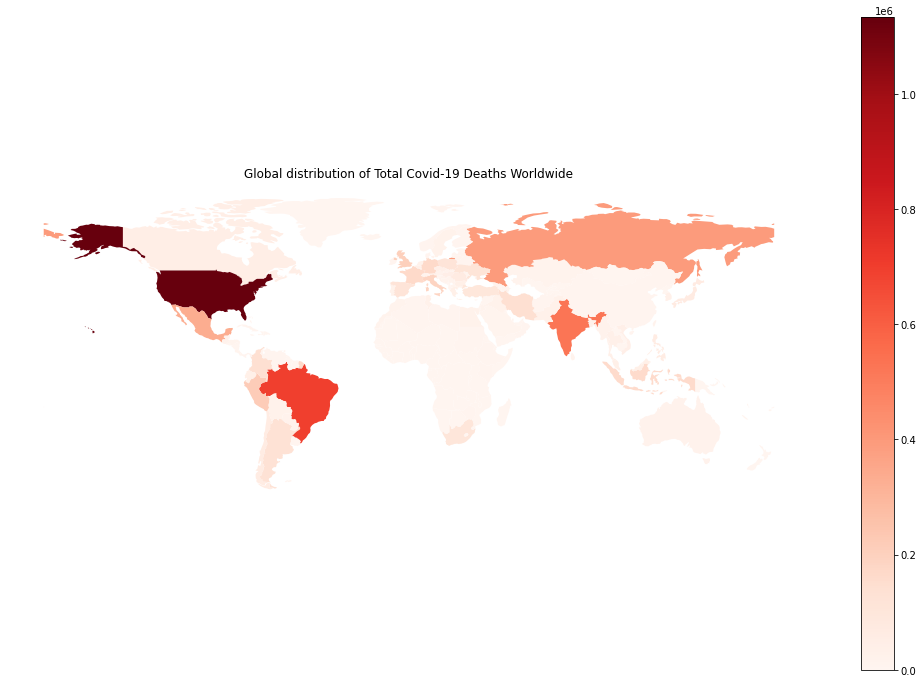

In [22]:
fig, ax = plt.subplots(figsize=(18,12))
merged.plot(column='Total Deaths', cmap='Reds', legend=True, ax=ax)
ax.set_title('Global distribution of Total Covid-19 Deaths Worldwide')
ax.set_axis_off()
plt.show()

5. What are the top 5 countries with active cases

In [23]:
merged_top5AC = merged.nlargest(5, 'Active Cases')
top5AC = pd.DataFrame({
        'Country': merged_top5AC['Country'],
        'Active Cases': merged_top5AC['Active Cases']
})
top5AC['Active Cases'] = top5AC['Active Cases'].map('{:.0f}'.format)
top5AC_style = top5AC.style.set_properties(subset=['Country'], **{'text-align': 'left'})
top5AC_style

,Country,Active Cases
155,Japan,10952618
4,United States of America,1741147
113,Poland,925549
94,Vietnam,870843
27,Mexico,429421


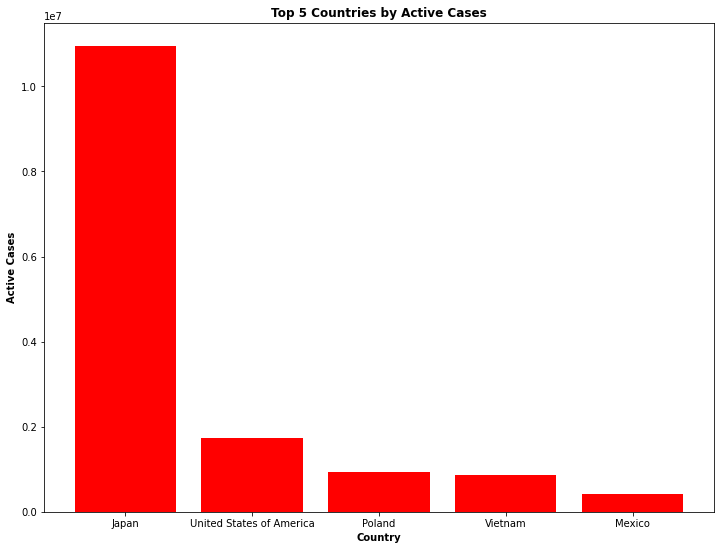

In [24]:
Country = merged_top5AC['Country']
Active_Cases = merged_top5AC['Active Cases']
fig = plt.figure(figsize=(12, 9))
plt.bar(Country, Active_Cases, color='red')
plt.xlabel('Country', weight='bold')
plt.ylabel('Active Cases', weight='bold')
plt.title('Top 5 Countries by Active Cases', weight='bold')
plt.show()

6. Top 5 Countries in Total Covid Recoveries

In [25]:
merged_top5TR = merged.nlargest(5, 'Total Recovered')
top5TR = pd.DataFrame({
        'Country': merged_top5TR['Country'],
        'Total Recovered': merged_top5TR['Total Recovered']
})
top5TR['Total Recovered'] = top5TR['Total Recovered'].map('{:.0f}'.format)
top5TR_style = top5TR.style.set_properties(subset=['Country'], **{'text-align': 'left'})
top5TR_style

,Country,Total Recovered
4,United States of America,101322779
98,India,44150289
43,France,39264546
121,Germany,37398100
29,Brazil,35919372


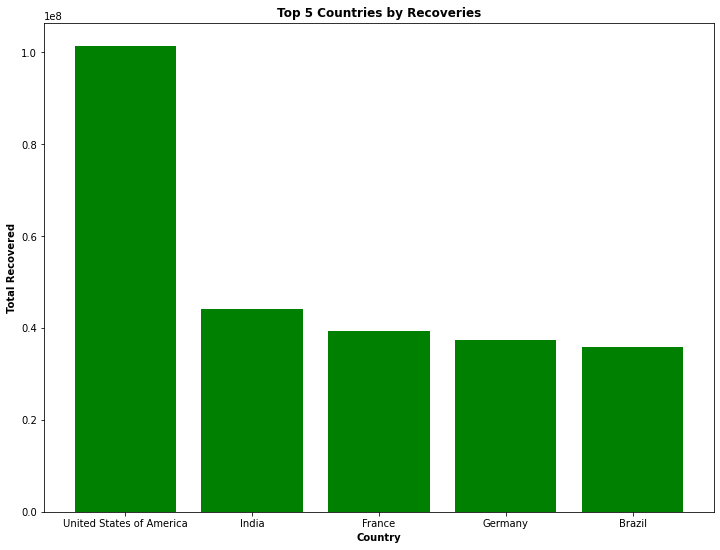

In [26]:
Country = merged_top5TR['Country']
Total_Recovered = merged_top5TR['Total Recovered']
fig = plt.figure(figsize=(12, 9))
plt.bar(Country, Total_Recovered, color='green')
plt.xlabel('Country', weight='bold')
plt.ylabel('Total Recovered', weight='bold')
plt.title('Top 5 Countries by Recoveries', weight='bold')
plt.show()

7. Top 5 Countries who conducted the most Covid-Tests

In [27]:
merged_top5CT = merged.nlargest(5, 'Total Test')
top5CT = pd.DataFrame({
        'Country': merged_top5CT['Country'],
        'Total Test': merged_top5CT['Total Test']
})
top5CT['Total Test'] = top5CT['Total Test'].map('{:.0f}'.format)
top5CT_style = top5CT.style.set_properties(subset=['Country'], **{'text-align': 'left'})
top5CT_style

,Country,Total Test
4,United States of America,1159832679
98,India,915265788
143,United Kingdom,522526476
132,Spain,471036328
18,Russia,273400000


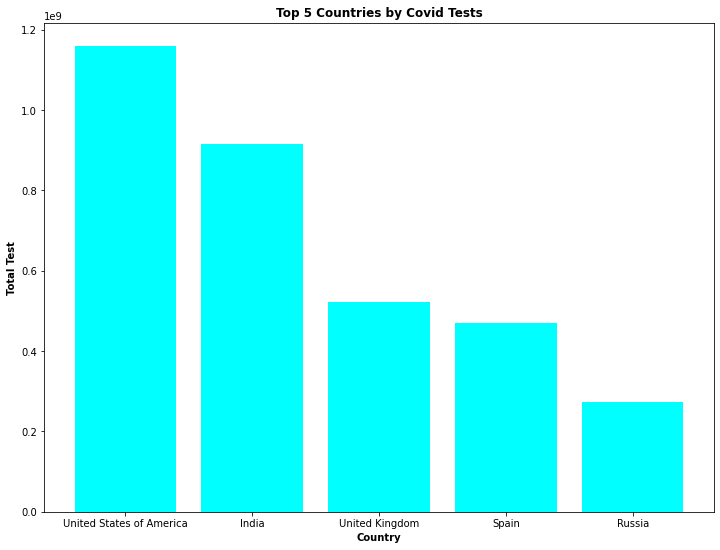

In [28]:
Country = merged_top5CT['Country']
Total_Test = merged_top5CT['Total Test']
fig = plt.figure(figsize=(12, 9))
plt.bar(Country, Total_Test, color='aqua')
plt.xlabel('Country', weight='bold')
plt.ylabel('Total Test', weight='bold')
plt.title('Top 5 Countries by Covid Tests', weight='bold')
plt.show()

8. What is the relationship between Population and Active Cases 

In [29]:
Con_Pop_Case = pd.DataFrame({
    'Country': merged['Country'],
    'Population': merged['Population'],
    'Active Cases': merged['Active Cases']
})

Con_Pop_Case.head()

,Country,Population,Active Cases
0,Fiji,909466.0,1157.0
1,Tanzania,63298550.0,0.0
2,W. Sahara,626161.0,0.0
3,Canada,38388419.0,55863.0
4,United States of America,334805269.0,1741147.0


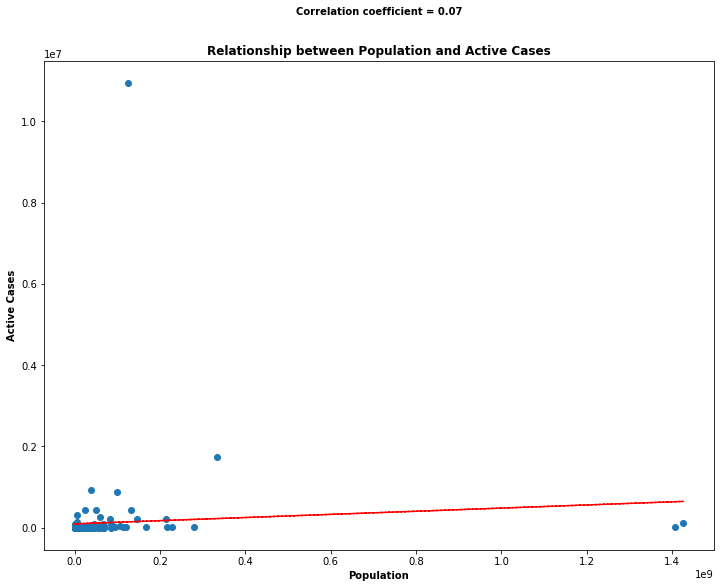

In [30]:
x = Con_Pop_Case['Population']
y = Con_Pop_Case['Active Cases']

fig = plt.figure(figsize=(12, 9))
plt.scatter(x, y)
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),'r--')
corr_coef = np.corrcoef(x, y)[0, 1]

plt.xlabel('Population', weight='bold')
plt.ylabel('Active Cases', weight='bold')
plt.title('Relationship between Population and Active Cases', weight='bold')
plt.text(0.5, 1.1, f"Correlation coefficient = {corr_coef:.2f}", ha='center', va='center', weight='bold', transform=plt.gca().transAxes)
plt.show()

9. The relationship between total covid test and the total number of people who recovered from covid

In [31]:
Con_Test_Rec = pd.DataFrame({
    'Country': merged['Country'],
    'Total Recovered': merged['Total Recovered'],
    'Total Test': merged['Total Test']
})

Con_Test_Rec.head()

,Country,Total Recovered,Total Test
0,Fiji,66780.0,6.677150e+05
1,Tanzania,0.0,0.000000e+00
2,W. Sahara,9.0,0.000000e+00
3,Canada,4444013.0,6.634312e+07
4,United States of America,101322779.0,1.159833e+09


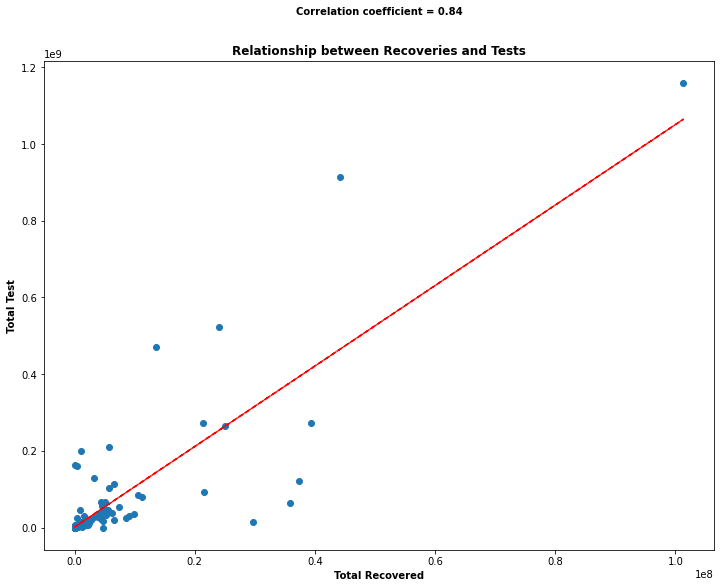

In [32]:
x = Con_Test_Rec['Total Recovered']
y = Con_Test_Rec['Total Test']

fig = plt.figure(figsize=(12, 9))
plt.scatter(x, y)
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),'r--')
corr_coef = np.corrcoef(x, y)[0, 1]

plt.xlabel('Total Recovered', weight='bold')
plt.ylabel('Total Test', weight='bold')
plt.title('Relationship between Recoveries and Tests', weight='bold')
plt.text(0.5, 1.1, f"Correlation coefficient = {corr_coef:.2f}", ha='center', va='center', weight='bold', transform=plt.gca().transAxes)
plt.show()